In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt


In [14]:
from sklearn.datasets import load_iris
iris = load_iris()

In [15]:
#store feature matrix in
data = load_iris()
data= pd.DataFrame(data= np.c_[iris['data']], columns=iris['feature_names'])
print(data)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


In [16]:
#store Target vector in
target = pd.DataFrame(data=np.c_[iris['target']], columns=['Species'])
target.head()

,Species
0,0
1,0
2,0
3,0
4,0


In [17]:
df = pd.concat([data, target], axis=1)
df = df.loc[df['Species'].isin([1,2])]
df=df.reset_index(drop=True)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,7.0,3.2,4.7,1.4,1
1,6.4,3.2,4.5,1.5,1
2,6.9,3.1,4.9,1.5,1
3,5.5,2.3,4.0,1.3,1
4,6.5,2.8,4.6,1.5,1


In [18]:
df1 = df.loc[:,['sepal length (cm)', 'petal length (cm)', 'Species']]
df1.head()

,sepal length (cm),petal length (cm),Species
0,7.0,4.7,1
1,6.4,4.5,1
2,6.9,4.9,1
3,5.5,4.0,1
4,6.5,4.6,1


C:\Users\iamha\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


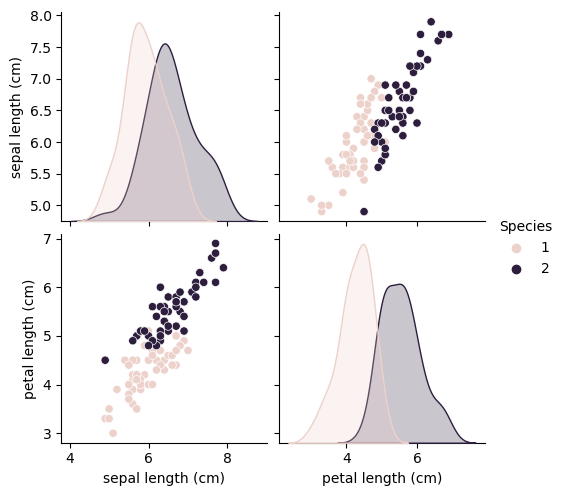

In [7]:
sns.pairplot(df1, hue='Species')

array([<Axes: title={'center': 'petal length (cm)'}, xlabel='[Species]'>,
       <Axes: title={'center': 'sepal length (cm)'}, xlabel='[Species]'>],
      dtype=object)

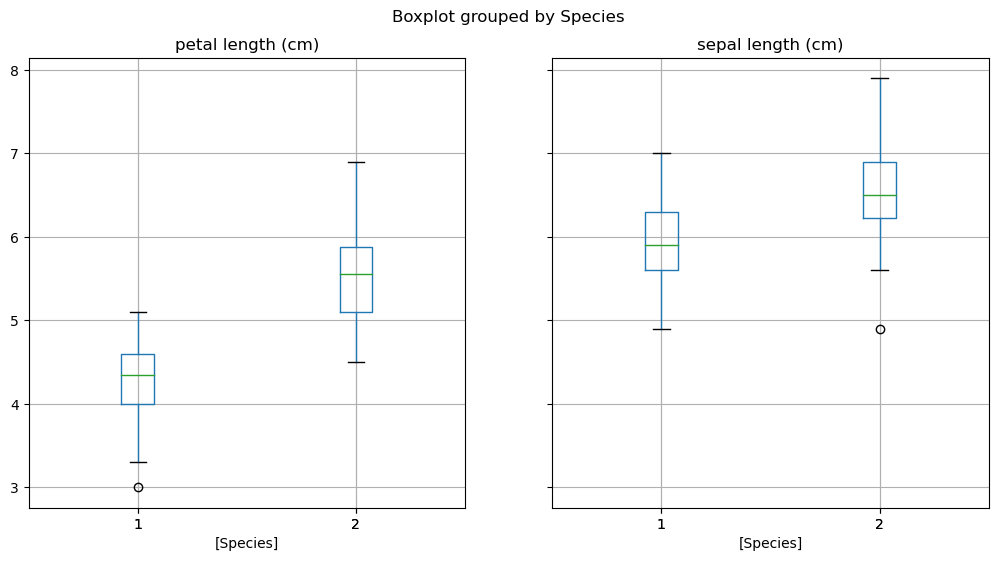

In [19]:
df1.boxplot(by='Species', figsize=(12, 6))


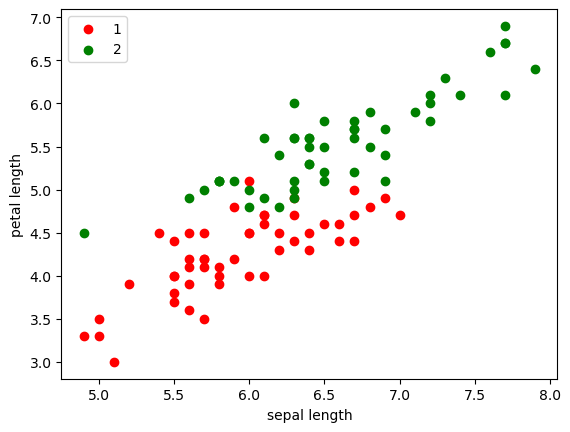

In [20]:
#other method
colors = ['red', 'green']
species = [1,2]
for i in range (2):
    x = df1[df1['Species'] == species[i]]
    plt.scatter(x['sepal length (cm)'], x['petal length (cm)'], c=colors[i], label=species[i])
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.legend()

<Axes: xlabel='Species', ylabel='petal length (cm)'>

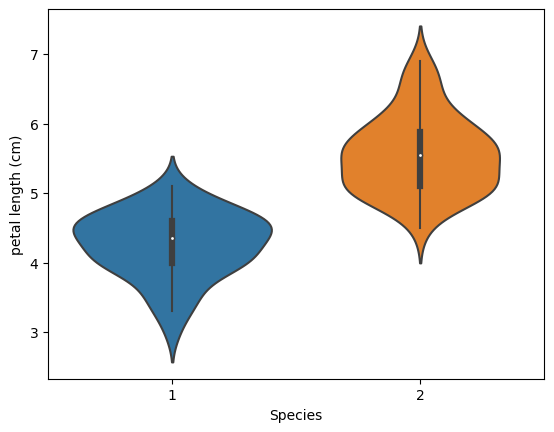

In [21]:
#sns.violinplot(x='Species', y='petal length (cm)', data=df1, figsize`(12,6)`)
sns.violinplot(x='Species', y='petal length (cm)', data=df1, figsize=(12, 6))


In [24]:
x = np.array(df1.loc[:, ['sepal length (cm)', 'petal length (cm)']])

x.shape

(100, 2)

In [25]:
y = np.array(df1.loc[:,['Species']]).ravel()
y.ndim

1

In [ ]:
#PROBLEM 3

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=42)
x_train.shape

(75, 2)

In [28]:
x_test.shape

(25, 2)

In [29]:
y_train.ndim

1

In [ ]:
#PROBLEM 4

In [30]:
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()
Scaler.fit(x_train)
X_trainTransform = Scaler.transform(x_train)
X_testTransform = Scaler.transform(x_test)

In [ ]:
#PROBLEM 5

In [31]:
from sklearn.neighbors import KNeighborsClassifier
#instantiate learning  model (k =5)
classifier5 = KNeighborsClassifier(n_neighbors=5)
classifier5.fit(X_trainTransform, y_train)

#predicting the Test set results
y_pred5 = classifier5.predict(X_testTransform)
print('Pred5 =', y_pred5)

#instantiate learning mode; (k=1)
classifier1 = KNeighborsClassifier(n_neighbors=1)
classifier1.fit(X_trainTransform, y_train)

#predicting the Test set results
y_pred1 = classifier1.predict(X_testTransform)
print('Pred1 =', y_pred1)

#instantiate learning  model (k =3)
classifier3 = KNeighborsClassifier(n_neighbors=3)
classifier3.fit(X_trainTransform, y_train)


#predicting the Test set results
y_pred3 = classifier3.predict(X_testTransform)
print('Pred3 =', y_pred3)

Pred5 = [2 2 2 1 1 1 1 2 1 1 1 1 1 2 2 1 1 1 1 1 2 1 1 1 2]
Pred1 = [2 2 2 1 1 1 2 2 1 1 1 1 2 2 2 1 1 1 1 1 2 1 1 1 2]
Pred3 = [2 2 2 1 1 1 2 2 1 1 1 1 2 2 2 1 1 1 1 1 2 1 1 1 2]


In [ ]:
#PROBLEM 6

In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
prediction = [y_pred5, y_pred3, y_pred1]
keys = ["knn5", 'knn3', 'knn1']

for a, prediction in enumerate(prediction, 0):
    print("Prediction of", keys[a])
    print('Accuracy =', accuracy_score(y_true=y_test, y_pred=prediction) * 100)
    print('Recall =', recall_score(y_true=y_test, y_pred=prediction, average=None))
    print('F1 Score =', f1_score(y_true=y_test, y_pred=prediction, average=None))
    print('Precision score =', precision_score(y_true=y_test, y_pred=prediction, average=None))
    print('Confusion matrix =', confusion_matrix(y_true=y_test, y_pred=prediction))
    print("............................................................")

Prediction of knn5
Accuracy = 80.0
Recall = [0.92857143 0.63636364]
F1 Score = [0.83870968 0.73684211]
Precision score = [0.76470588 0.875     ]
Confusion matrix = [[13  1]
 [ 4  7]]
............................................................
Prediction of knn3
Accuracy = 80.0
Recall = [0.85714286 0.72727273]
F1 Score = [0.82758621 0.76190476]
Precision score = [0.8 0.8]
Confusion matrix = [[12  2]
 [ 3  8]]
............................................................
Prediction of knn1
Accuracy = 80.0
Recall = [0.85714286 0.72727273]
F1 Score = [0.82758621 0.76190476]
Precision score = [0.8 0.8]
Confusion matrix = [[12  2]
 [ 3  8]]
............................................................


In [ ]:
PROBLEM 7

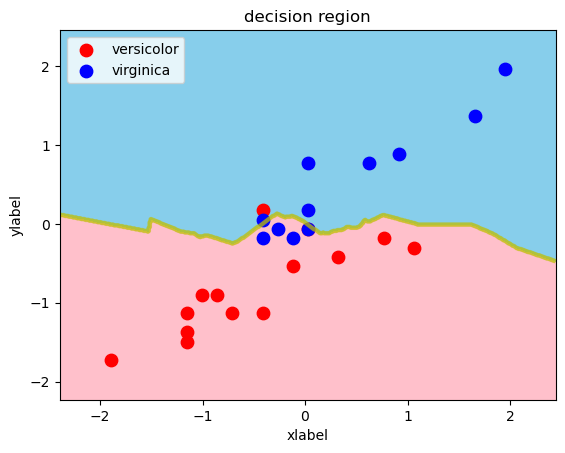

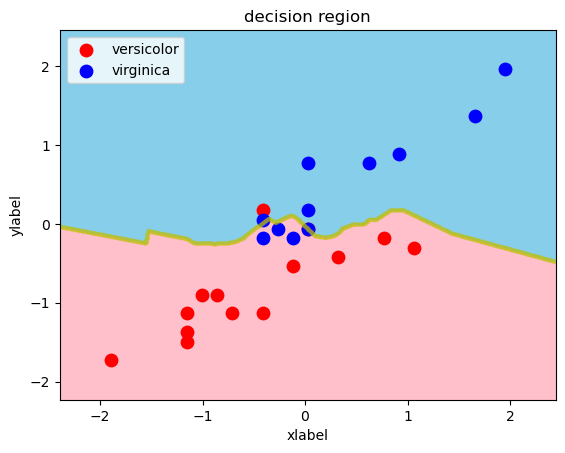

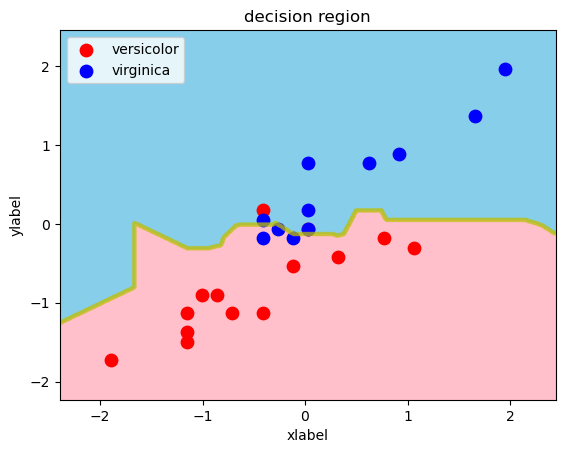

In [34]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    Draw the determination area of the model that learned binary classification with two-dimensional features.
    The background color is drawn from the estimated values of the trained model.
    The points on the scatter plot are training or validation data.

    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        Feature value
    y : ndarray, shape(n_samples,)
        label
    model : object
        Insert the installed model of the learned model
    step : float, (default : 0.1)
        Set the interval to calculate the estimate
    title : str
        Give the text of the graph Title
    xlabel, ylabel : str
        Give the text of the axis label
    target_names= : list of str
        Give a list of legends
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2

    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    


    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(np.unique(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

models= [classifier5, classifier3, classifier1]
for a, model in enumerate(models, 1):
    decision_region(X_testTransform, y_test, model)



In [ ]:
#PROBLEM 8

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier


In [62]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
neig = KNeighborsClassifier()
neig.fit(X_trainTransform, y_train)
y_predn = neig.predict(X_testTransform)
print(y_predn)

[2 2 2 1 1 1 1 2 1 1 1 1 1 2 2 1 1 1 1 1 2 1 1 1 2]


In [64]:
#LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression()
lr_classifier.fit(X_trainTransform, y_train)
y_pred_lrc = lr_classifier.predict(X_testTransform)
print(y_pred_lrc)


[2 2 2 1 1 1 2 2 1 1 1 1 2 2 2 1 1 2 1 1 2 1 1 1 2]


In [65]:
#SVM
# SVM
from sklearn import svm
clf = svm.SVC()
clf.fit(X_trainTransform, y_train)
y_pred_svm =clf.predict(x_test)
print(y_pred_svm)


[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [66]:
#DECISION TREE
from sklearn.tree import DecisionTreeClassifier
D_tree = DecisionTreeClassifier()
D_tree.fit(X_trainTransform, y_train)
y_pred_dtree =D_tree.predict(X_testTransform)
print(y_pred_dtree)

[2 2 2 1 1 1 1 2 1 1 1 1 1 2 2 1 1 2 1 1 2 1 1 1 2]


In [72]:
#random forest
from sklearn.ensemble import RandomForestClassifier
R_forest = DecisionTreeClassifier()
R_forest.fit(X_trainTransform, y_train)
y_pred_rforest =R_forest.predict(X_testTransform)
print(y_pred_rforest)

[2 2 2 1 1 1 1 2 1 1 1 1 1 2 2 1 1 2 1 1 2 1 1 1 2]


[2 2 2 1 1 1 1 2 1 1 1 1 1 2 2 1 1 1 1 1 2 1 1 1 2]
Accuracy = 80.0
Recall = [0.92857143 0.63636364]
F1 Score = [0.83870968 0.73684211]
Precision score = [0.76470588 0.875     ]
Confusion matrix = [[13  1]
 [ 4  7]]


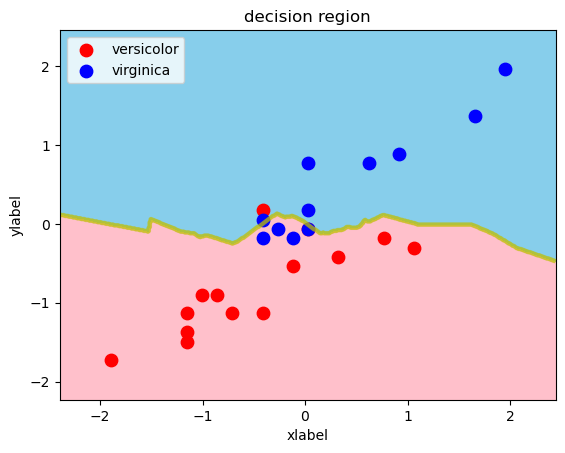



[2 2 2 1 1 1 2 2 1 1 1 1 2 2 2 1 1 2 1 1 2 1 1 1 2]
Accuracy = 84.0
Recall = [0.85714286 0.81818182]
F1 Score = [0.85714286 0.81818182]
Precision score = [0.85714286 0.81818182]
Confusion matrix = [[12  2]
 [ 2  9]]


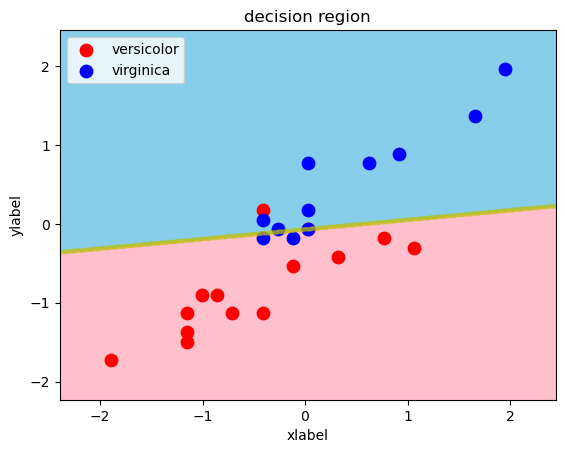



[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
Accuracy = 44.0
Recall = [0. 1.]
F1 Score = [0.         0.61111111]
Precision score = [0.   0.44]
Confusion matrix = [[ 0 14]
 [ 0 11]]


C:\Users\iamha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


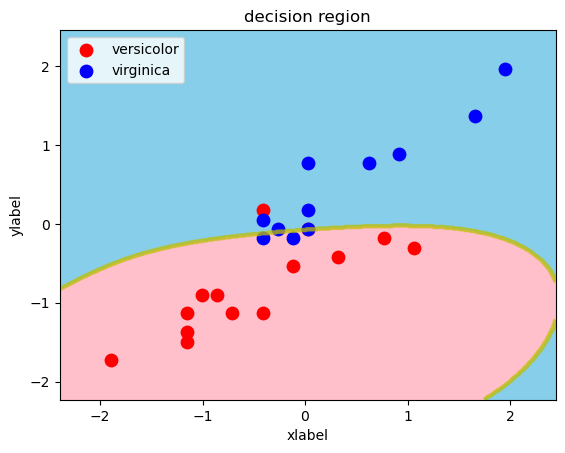



[2 2 2 1 1 1 1 2 1 1 1 1 1 2 2 1 1 2 1 1 2 1 1 1 2]
Accuracy = 84.0
Recall = [0.92857143 0.72727273]
F1 Score = [0.86666667 0.8       ]
Precision score = [0.8125     0.88888889]
Confusion matrix = [[13  1]
 [ 3  8]]


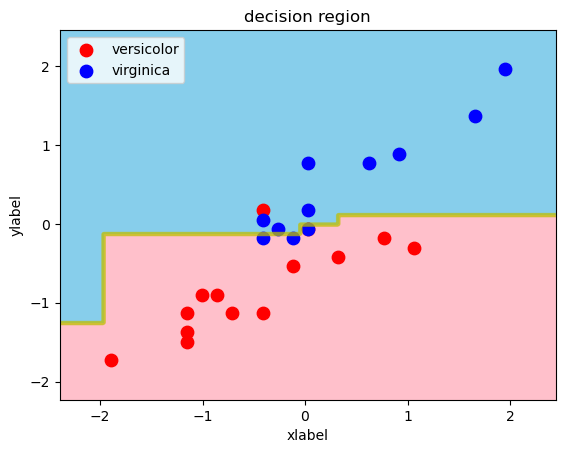



[2 2 2 1 1 1 1 2 1 1 1 1 1 2 2 1 1 2 1 1 2 1 1 1 2]
Accuracy = 84.0
Recall = [0.92857143 0.72727273]
F1 Score = [0.86666667 0.8       ]
Precision score = [0.8125     0.88888889]
Confusion matrix = [[13  1]
 [ 3  8]]


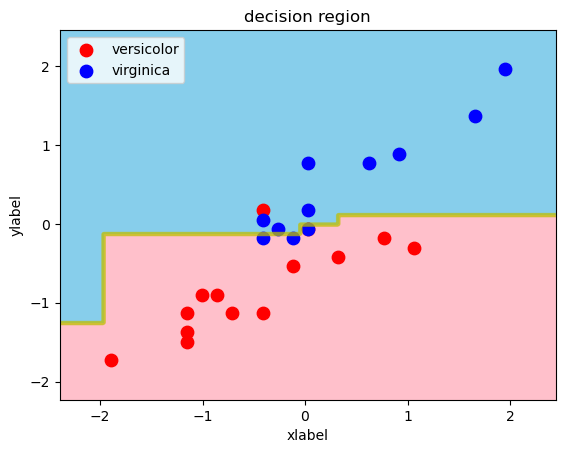

In [73]:
#evaluation
#from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

print(y_predn)
print('Accuracy =', accuracy_score(y_true=y_test, y_pred=y_predn) * 100)
print('Recall =', recall_score(y_true=y_test, y_pred=y_predn, average=None))
print('F1 Score =', f1_score(y_true=y_test, y_pred=y_predn, average=None))
print('Precision score =', precision_score(y_true=y_test, y_pred=y_predn, average=None))
print('Confusion matrix =', confusion_matrix(y_true=y_test, y_pred=y_predn))
decision_region(X_testTransform, y_test, neig)
print('\n')

print(y_pred_lrc)
print('Accuracy =', accuracy_score(y_true=y_test, y_pred=y_pred_lrc) * 100)
print('Recall =', recall_score(y_true=y_test, y_pred=y_pred_lrc, average=None))
print('F1 Score =', f1_score(y_true=y_test, y_pred=y_pred_lrc, average=None))
print('Precision score =', precision_score(y_true=y_test, y_pred=y_pred_lrc, average=None))
print('Confusion matrix =', confusion_matrix(y_true=y_test, y_pred=y_pred_lrc))
decision_region(X_testTransform, y_test, lr_classifier)
print('\n')

print(y_pred_svm)
print('Accuracy =', accuracy_score(y_true=y_test, y_pred=y_pred_svm) * 100)
print('Recall =', recall_score(y_true=y_test, y_pred=y_pred_svm, average=None))
print('F1 Score =', f1_score(y_true=y_test, y_pred=y_pred_svm, average=None))
print('Precision score =', precision_score(y_true=y_test, y_pred=y_pred_svm, average=None))
print('Confusion matrix =', confusion_matrix(y_true=y_test, y_pred=y_pred_svm))
decision_region(X_testTransform, y_test, clf)
print('\n')

print(y_pred_dtree)
print('Accuracy =', accuracy_score(y_true=y_test, y_pred=y_pred_dtree) * 100)
print('Recall =', recall_score(y_true=y_test, y_pred=y_pred_dtree, average=None))
print('F1 Score =', f1_score(y_true=y_test, y_pred=y_pred_dtree, average=None))
print('Precision score =', precision_score(y_true=y_test, y_pred=y_pred_dtree, average=None))
print('Confusion matrix =', confusion_matrix(y_true=y_test, y_pred=y_pred_dtree))
decision_region(X_testTransform, y_test, D_tree)
print('\n')

print(y_pred_rforest)
print('Accuracy =', accuracy_score(y_true=y_test, y_pred=y_pred_rforest) * 100)
print('Recall =', recall_score(y_true=y_test, y_pred=y_pred_rforest, average=None))
print('F1 Score =', f1_score(y_true=y_test, y_pred=y_pred_rforest, average=None))
print('Precision score =', precision_score(y_true=y_test, y_pred=y_pred_rforest, average=None))
print('Confusion matrix =', confusion_matrix(y_true=y_test, y_pred=y_pred_rforest))
decision_region(X_testTransform, y_test, R_forest)
print('\n')



In [ ]:
#PROBLEM 9

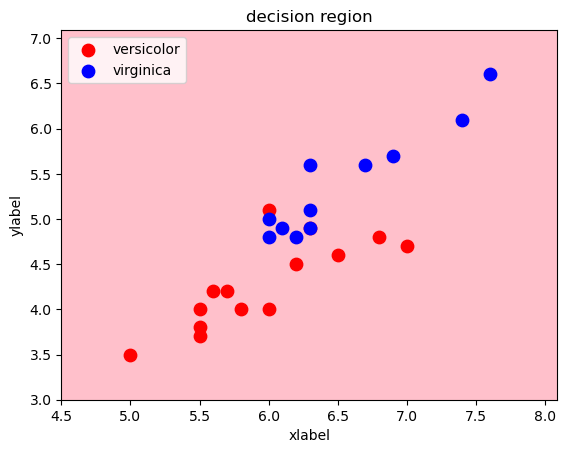

In [77]:
def comp_standard(title, prediction, model, std):
    print(title)
    print('Accuracy =', accuracy_score(y_true=y_test, y_pred=prediction) * 100)
    print('Recall =', recall_score(y_true=y_test, y_pred=prediction, average=None))
    print('F1 Score =', f1_score(y_true=y_test, y_pred=prediction, average=None))
    print('Precision score =', precision_score(y_true=y_test, y_pred=prediction, average=None))
    print('Confusion matrix =', confusion_matrix(y_true=y_test, y_pred=prediction))
decision_region(x_test, y_test, model)
model = [neig, lr_classifier, clf, D_tree, R_forest]

In [109]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
neig = KNeighborsClassifier()
neig.fit(x_train, y_train)
y_predn = neig.predict(x_test)
comp_standard('KNN', y_predn, neig, std=False)
#decision_region(x_test, y_test, neig)
print('...................................................')

#LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression()
lr_classifier.fit(x_train, y_train)
y_pred_lrc = lr_classifier.predict(x_test)
print(y_pred_lrc)
comp_standard('LOGISTIC REGRESSION', y_pred_lrc, lr_classifier, std=False)
print('...................................................')

# SVM
from sklearn import svm
clf = svm.SVC()
clf.fit(x_train, y_train)
y_pred_svm =clf.predict(x_test)
comp_standard('SVM', y_pred_svm, clf, std=False)
print('...................................................')

#DECISION TREE
from sklearn.tree import DecisionTreeClassifier
D_tree = DecisionTreeClassifier(criterion='entropy', random_state=0)
D_tree.fit(x_train, y_train)
y_pred_dtree =D_tree.predict(x_test)
comp_standard('DECISION TREE', y_pred_dtree, D_tree, std=False)
print('...................................................')

#random forest
from sklearn.ensemble import RandomForestClassifier
R_forest = DecisionTreeClassifier(random_state=0)
R_forest.fit(x_train, y_train)
y_pred_rforest =R_forest.predict(x_test)
comp_standard('Random Forest', y_pred_dtree, D_tree, std=False)
print('...................................................')

KNN
Accuracy = 80.0
Recall = [0.92857143 0.63636364]
F1 Score = [0.83870968 0.73684211]
Precision score = [0.76470588 0.875     ]
Confusion matrix = [[13  1]
 [ 4  7]]
...................................................
[2 2 2 1 1 1 2 2 1 1 1 1 2 2 2 1 1 2 1 1 2 1 1 1 2]
LOGISTIC REGRESSION
Accuracy = 84.0
Recall = [0.85714286 0.81818182]
F1 Score = [0.85714286 0.81818182]
Precision score = [0.85714286 0.81818182]
Confusion matrix = [[12  2]
 [ 2  9]]
...................................................
SVM
Accuracy = 84.0
Recall = [0.85714286 0.81818182]
F1 Score = [0.85714286 0.81818182]
Precision score = [0.85714286 0.81818182]
Confusion matrix = [[12  2]
 [ 2  9]]
...................................................
DECISION TREE
Accuracy = 80.0
Recall = [0.92857143 0.63636364]
F1 Score = [0.83870968 0.73684211]
Precision score = [0.76470588 0.875     ]
Confusion matrix = [[13  1]
 [ 4  7]]
...................................................
Random Forest
Accuracy = 80.0
Recall = [0.

In [110]:
#PROBLEM 10
#new training set
X1 = np.array(data.loc[:, ['sepal length (cm)', 'petal length (cm)']])
X1.shape

(150, 2)

In [111]:
Y1=np.array(target).ravel()
Y1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [112]:
#TRAIN TEST SPLIT
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1,Y1, test_size=0.25, random_state=42)
X1_train.shape, X1_test.shape, Y1_train.shape, Y1_test.shape

((112, 2), (38, 2), (112,), (38,))

In [113]:
#KNN
neig = KNeighborsClassifier(n_neighbors=3)
neig.fit(X1_train, Y1_train)
Y1_predn = neig.predict(X1_test)

#LOGISTIC REGRESSION
lr_classifier = LogisticRegression()
lr_classifier.fit(X1_train, Y1_train)
Y1_pred_lrc = lr_classifier.predict(X1_test)

#SVM
clf = svm.SVC()
clf.fit(X1_train, Y1_train)
Y1_pred_svm =clf.predict(X1_test)

#DECISION TREE
D_tree = DecisionTreeClassifier()
D_tree.fit(X1_train, Y1_train)
Y1_pred_dtree =D_tree.predict(X1_test)

R_forest = DecisionTreeClassifier(random_state=0)
R_forest.fit(X1_train, Y1_train)
Y1_pred_rforest =R_forest.predict(X1_test)

In [121]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def decision_region1(X, y, model, step=0.01, title='decision region1', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica', 'setosa']):
    """
    Draw the determination area of the model that learned binary classification with two-dimensional features.
    The background color is drawn from the estimated values of the trained model.
    The points on the scatter plot are training or validation data.

    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        Feature value
    y : ndarray, shape(n_samples,)
        label
    model : object
        Insert the installed model of the learned model
    step : float, (default : 0.1)
        Set the interval to calculate the estimate
    title : str
        Give the text of the graph Title
    xlabel, ylabel : str
        Give the text of the axis label
    target_names= : list of str
        Give a list of legends
    """
    # setting
    scatter_color = ['red', 'blue', 'green']
    contourf_color = ['pink', 'purple', 'brown']
    n_class = 2

    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    


    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(np.unique(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

models= [neig, lr_classifier, clf, D_tree, R_forest ]
#for a, model in enumerate(models, 1):
   # decision_region(X_testTransform, y_test, model)


KNN
[1 0 2 1 1 0 1 1 1 1 2 0 0 0 0 2 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
Accuracy = 94.73684210526315
Recall = [1.         0.90909091 0.91666667]
F1 Score = [1.         0.90909091 0.91666667]
Precision score = [1.         0.90909091 0.91666667]
Confusion matrix = [[15  0  0]
 [ 0 10  1]
 [ 0  1 11]]


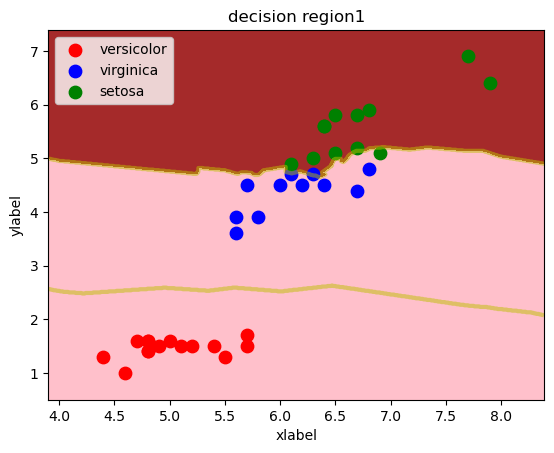

LOGISTIC REGRESSION
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
Accuracy = 100.0
Recall = [1. 1. 1.]
F1 Score = [1. 1. 1.]
Precision score = [1. 1. 1.]
Confusion matrix = [[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


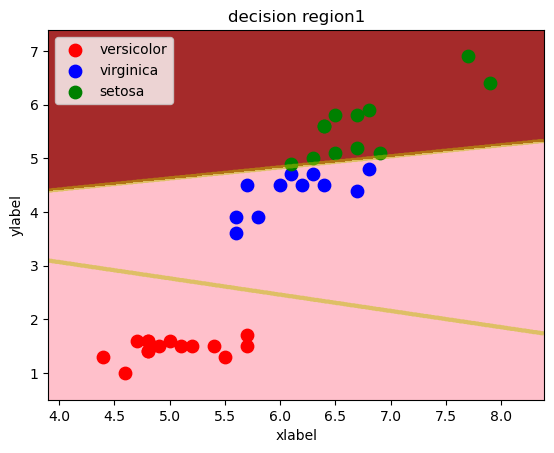

SVM
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
Accuracy = 100.0
Recall = [1. 1. 1.]
F1 Score = [1. 1. 1.]
Precision score = [1. 1. 1.]
Confusion matrix = [[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


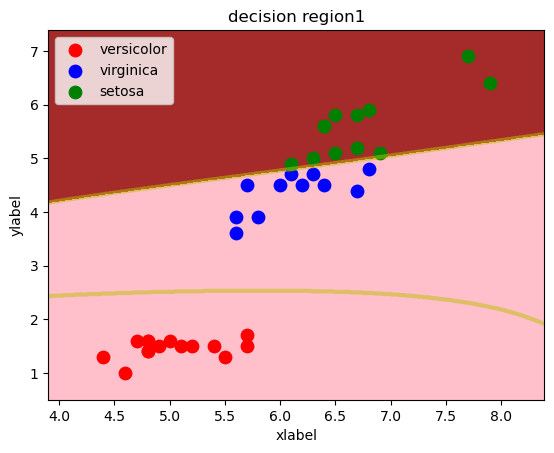

DECISION TREE
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 1 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
Accuracy = 97.36842105263158
Recall = [1.         1.         0.91666667]
F1 Score = [1.         0.95652174 0.95652174]
Precision score = [1.         0.91666667 1.        ]
Confusion matrix = [[15  0  0]
 [ 0 11  0]
 [ 0  1 11]]


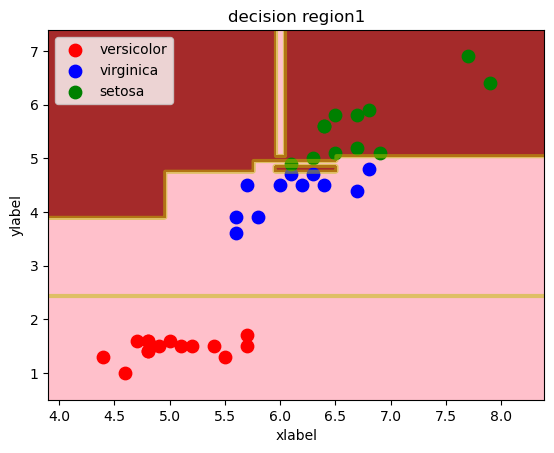

RANDOM FOREST
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
Accuracy = 100.0
Recall = [1. 1. 1.]
F1 Score = [1. 1. 1.]
Precision score = [1. 1. 1.]
Confusion matrix = [[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


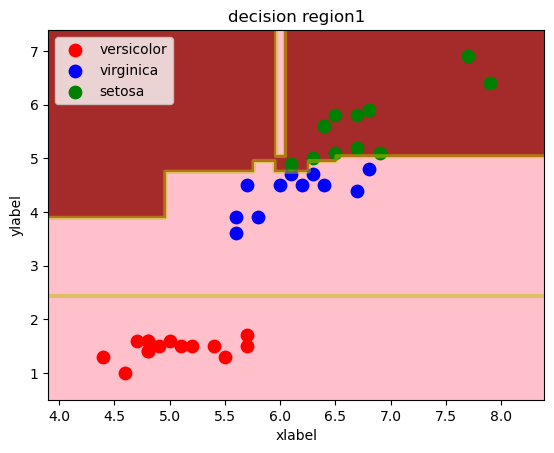

In [123]:
print('KNN')
print(Y1_predn)
print('Accuracy =', accuracy_score(y_true=Y1_test, y_pred=Y1_predn) * 100)
print('Recall =', recall_score(y_true=Y1_test, y_pred=Y1_predn, average=None))
print('F1 Score =', f1_score(y_true=Y1_test, y_pred=Y1_predn, average=None))
print('Precision score =', precision_score(y_true=Y1_test, y_pred=Y1_predn, average=None))
print('Confusion matrix =', confusion_matrix(y_true=Y1_test, y_pred=Y1_predn))
decision_region1(X1_test, Y1_test, neig)

print('LOGISTIC REGRESSION')
print(Y1_pred_lrc)
print('Accuracy =', accuracy_score(y_true=Y1_test, y_pred=Y1_pred_lrc) * 100)
print('Recall =', recall_score(y_true=Y1_test, y_pred=Y1_pred_lrc, average=None))
print('F1 Score =', f1_score(y_true=Y1_test, y_pred=Y1_pred_lrc, average=None))
print('Precision score =', precision_score(y_true=Y1_test, y_pred=Y1_pred_lrc, average=None))
print('Confusion matrix =', confusion_matrix(y_true=Y1_test, y_pred=Y1_pred_lrc))
decision_region1(X1_test, Y1_test, lr_classifier)

print('SVM')
print(Y1_pred_svm)
print('Accuracy =', accuracy_score(y_true=Y1_test, y_pred=Y1_pred_svm) * 100)
print('Recall =', recall_score(y_true=Y1_test, y_pred=Y1_pred_svm, average=None))
print('F1 Score =', f1_score(y_true=Y1_test, y_pred=Y1_pred_svm, average=None))
print('Precision score =', precision_score(y_true=Y1_test, y_pred=Y1_pred_svm, average=None))
print('Confusion matrix =', confusion_matrix(y_true=Y1_test, y_pred=Y1_pred_svm))
decision_region1(X1_test, Y1_test, clf)

print('DECISION TREE')
print(Y1_pred_dtree)
print('Accuracy =', accuracy_score(y_true=Y1_test, y_pred=Y1_pred_dtree) * 100)
print('Recall =', recall_score(y_true=Y1_test, y_pred=Y1_pred_dtree, average=None))
print('F1 Score =', f1_score(y_true=Y1_test, y_pred=Y1_pred_dtree, average=None))
print('Precision score =', precision_score(y_true=Y1_test, y_pred=Y1_pred_dtree, average=None))
print('Confusion matrix =', confusion_matrix(y_true=Y1_test, y_pred=Y1_pred_dtree))
decision_region1(X1_test, Y1_test, D_tree)

print('RANDOM FOREST')
print(Y1_pred_rforest)
print('Accuracy =', accuracy_score(y_true=Y1_test, y_pred=Y1_pred_rforest) * 100)
print('Recall =', recall_score(y_true=Y1_test, y_pred=Y1_pred_rforest, average=None))
print('F1 Score =', f1_score(y_true=Y1_test, y_pred=Y1_pred_rforest, average=None))
print('Precision score =', precision_score(y_true=Y1_test, y_pred=Y1_pred_rforest, average=None))
print('Confusion matrix =', confusion_matrix(y_true=Y1_test, y_pred=Y1_pred_rforest))
decision_region1(X1_test, Y1_test, R_forest)


